# Predicting churn or not trough Decision Tree, Random Forest and XGBoost

**Problem Formulation**

We want to predict if a customer will churn or not.

 **Loading the Packages we need**

In [39]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

# To install sklearn type "pip install numpy scipy scikit-learn" to the anaconda terminal

# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(8,6)})

# Datetime lib
from pandas import to_datetime
import itertools
import warnings
import datetime
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

# pip install graphviz
# pip install xgboost
# conda install python-graphviz

**Reading / Loading the Raw Data into Python From CSV**

In [40]:
# Loading the data
raw_data = pd.read_csv('C:\\Users\\Tuta\\Documents\\Biblioteca do Engenheiro\\Linguagem Computacional\\Python\\Data science\\Predicting Churn\\Churn.csv', sep='\t')

# print the shape
print(raw_data.shape)

#runs the first 5 rows
raw_data.head()

(10000, 15)


,Unnamed: 0,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Data Pre-Processing Phase**

In [41]:
# Investigate all the elements whithin each Feature 

for column in raw_data:
    unique_vals = np.unique(raw_data[column])
    nr_values = len(unique_vals)
    if nr_values < 12:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Unnamed: 0 :10000
The number of values for feature RowNumber :10000
The number of values for feature CustomerId :10000
The number of values for feature Surname :2932
The number of values for feature CreditScore :460
The number of values for feature Geography :3 -- ['France' 'Germany' 'Spain']
The number of values for feature Gender :2 -- ['Female' 'Male']
The number of values for feature Age :70
The number of values for feature Tenure :11 -- [ 0  1  2  3  4  5  6  7  8  9 10]
The number of values for feature Balance :6382
The number of values for feature NumOfProducts :4 -- [1 2 3 4]
The number of values for feature HasCrCard :2 -- [0 1]
The number of values for feature IsActiveMember :2 -- [0 1]
The number of values for feature EstimatedSalary :9999
The number of values for feature Exited :2 -- [0 1]


In [42]:
# Checking for null values
raw_data.isnull().sum()

Unnamed: 0         0
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [43]:
# Just to get easyer the columns names
raw_data.columns

Index(['Unnamed: 0', 'RowNumber', 'CustomerId', 'Surname', 'CreditScore',
       'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

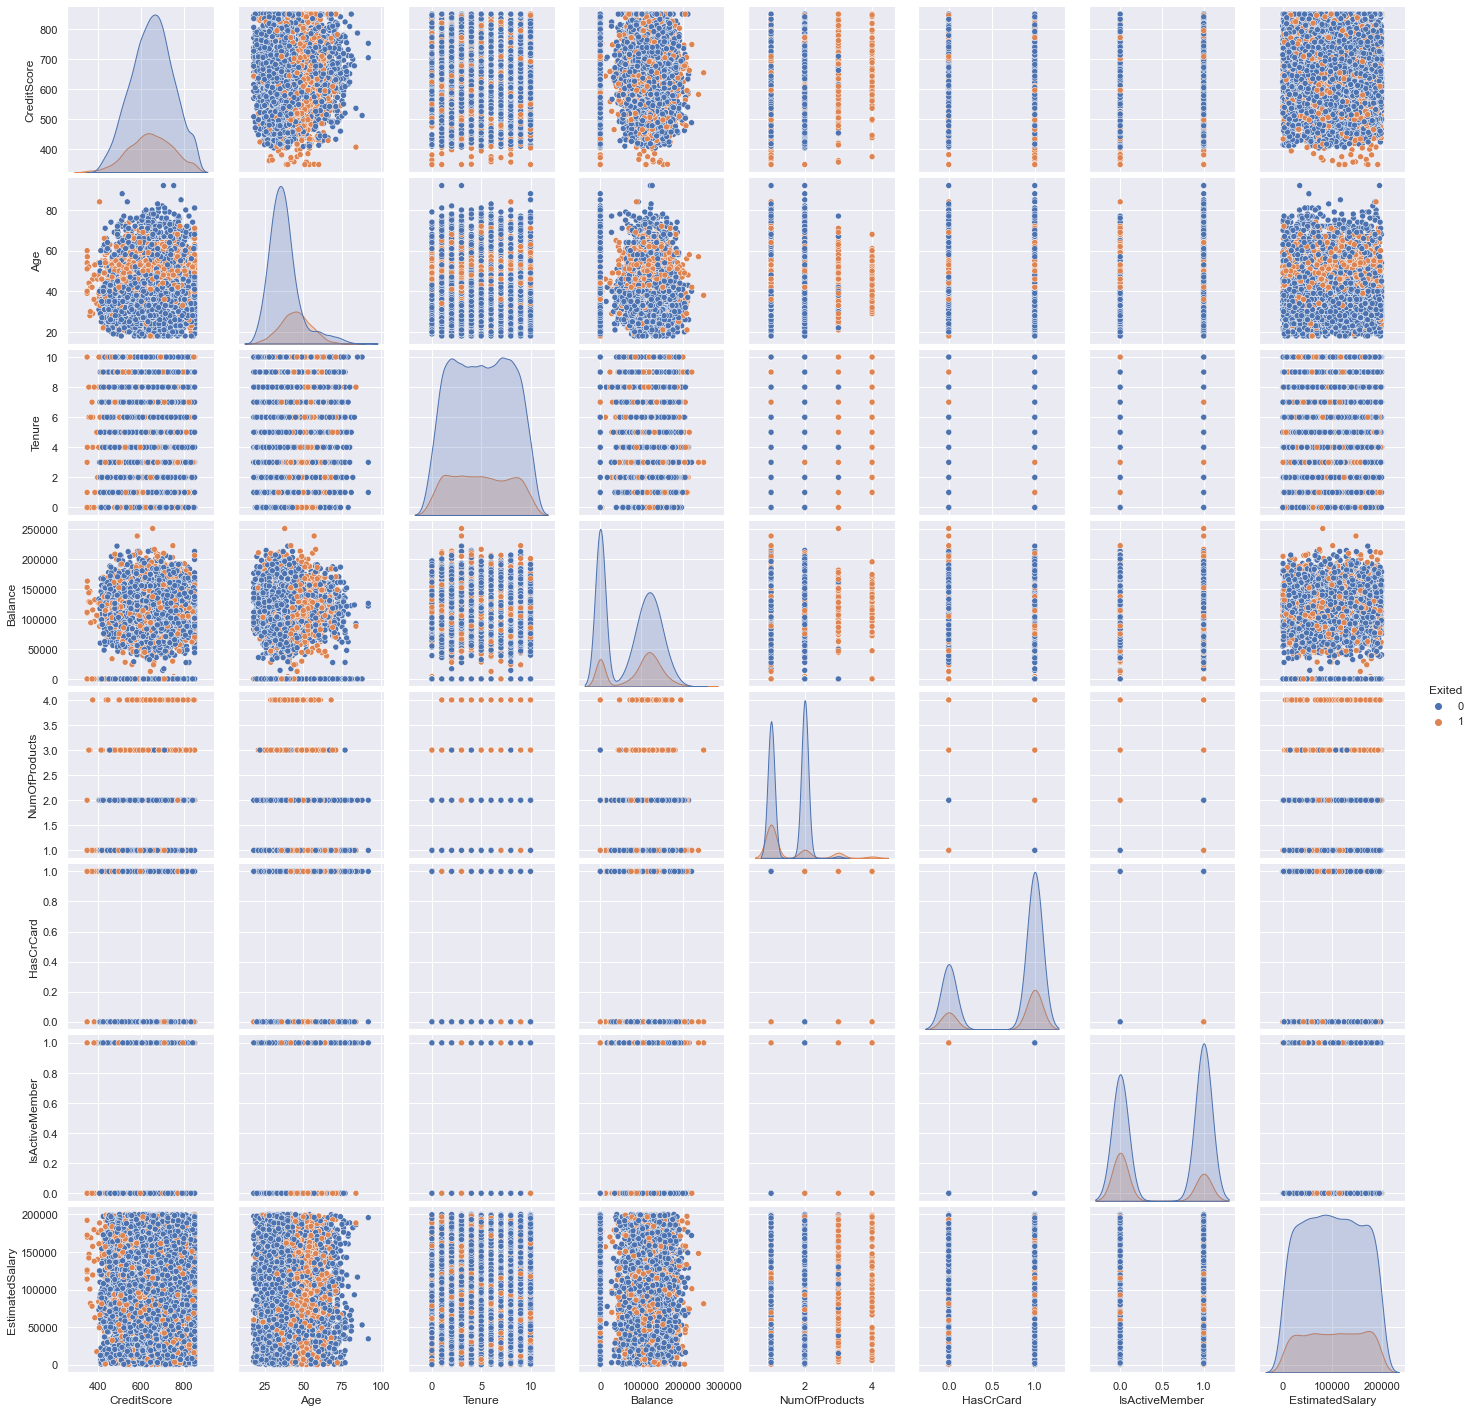

In [44]:
# Limiting the data
raw_data2 = raw_data[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited']]

# Visualize the data using seaborn Pairplots
g = sns.pairplot(raw_data2, hue = 'Exited', diag_kws={'bw': 0.2})

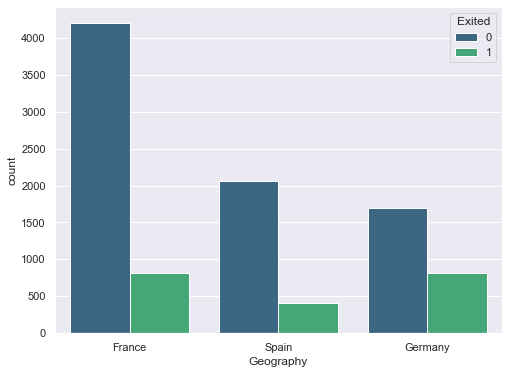

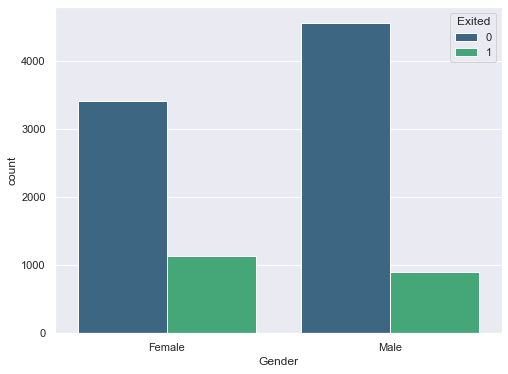

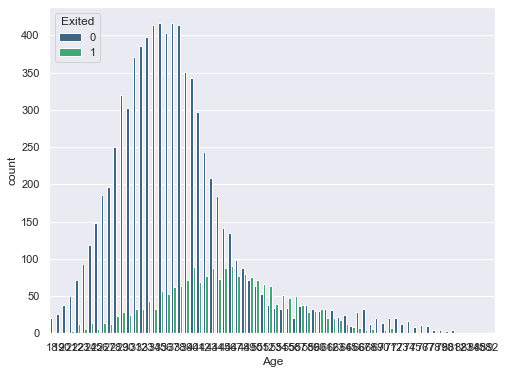

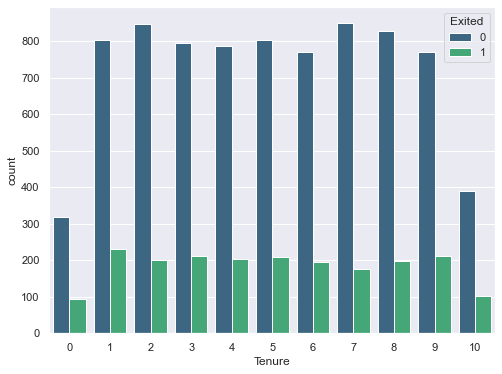

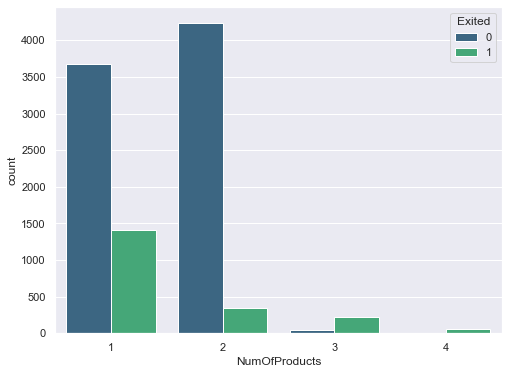

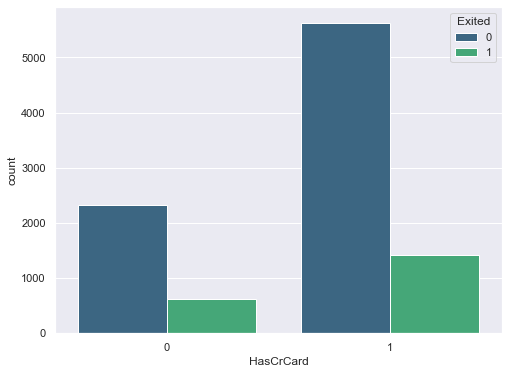

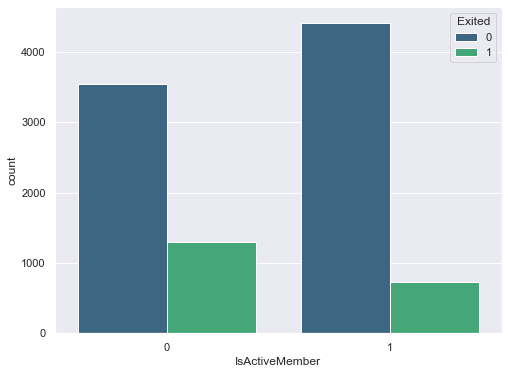

In [45]:
# Investigate all the features by our target

features = ['Geography', 'Gender', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember']


for f in features:
    plt.figure()
    ax = sns.countplot(x=f, data=raw_data2, hue = 'Exited', palette="viridis")

In [46]:
raw_data2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [47]:
# Making categorical variables into numeric representation

new_raw_data = pd.get_dummies(raw_data2, columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember'])
new_raw_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,619,42,2,0.00,1,101348.88,1,1,0,0,1,0,0,1,0,1
1,608,41,1,83807.86,1,112542.58,0,0,0,1,1,0,1,0,0,1
2,502,42,8,159660.80,3,113931.57,1,1,0,0,1,0,0,1,1,0
3,699,39,1,0.00,2,93826.63,0,1,0,0,1,0,1,0,1,0
4,850,43,2,125510.82,1,79084.10,0,0,0,1,1,0,0,1,0,1


In [48]:
# Scaling our columns -> Standardization of the data

scale_vars = ['CreditScore','EstimatedSalary','Balance','Age']
scaler = MinMaxScaler()
new_raw_data[scale_vars] = scaler.fit_transform(new_raw_data[scale_vars])
new_raw_data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,0.538,0.324324,2,0.000000,1,0.506735,1,1,0,0,1,0,0,1,0,1
1,0.516,0.310811,1,0.334031,1,0.562709,0,0,0,1,1,0,1,0,0,1
2,0.304,0.324324,8,0.636357,3,0.569654,1,1,0,0,1,0,0,1,1,0
3,0.698,0.283784,1,0.000000,2,0.469120,0,1,0,0,1,0,1,0,1,0
4,1.000,0.337838,2,0.500246,1,0.395400,0,0,0,1,1,0,0,1,0,1


**Splitting the Raw Data - Hold-out validation**

In [49]:
# Your code goes here
X = new_raw_data.drop('Exited', axis=1).values# Input features (attributes)
y = new_raw_data['Exited'].values # Target vector
print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, test_size=0.1, random_state=0)

X shape: (10000, 15)
y shape: (10000,)


**Running Decision Tree**

**Notes:**

Decision Trees are a supervised learning method used for classification and regression
How it works:

- The ID3 algorithm begins with the original set {S} S as the root node
- On each iteration of the algorithm, it iterates through every unused attribute of the set and calculates the entropy (or information gain) of that attribute
- It then selects the attribute which has the smallest entropy (or largest information gain) value.
- The set is then split by the selected attribute to produce subsets of the data.
- The algorithm continues to recurse on each subset, considering only attributes never selected before.

How Decision Tree works best explenation: https://www.youtube.com/watch?v=_XhOdSLlE5c&ab_channel=VictorLavrenko

What is information gain / entropy: https://www.youtube.com/watch?v=nodQ2s0CUbI&ab_channel=VictorLavrenko

Scikit Documentation: https://scikit-learn.org/stable/modules/tree.html

In [50]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)
dt.fit(X_train, y_train)

# Doc:https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=1)

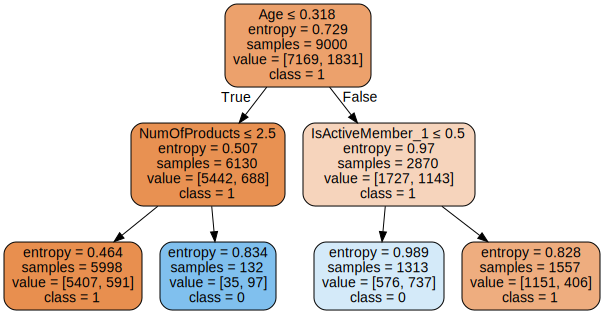

In [51]:
import graphviz 

dot_data = tree.export_graphviz(dt, out_file=None, 
    feature_names=new_raw_data.drop('Exited', axis=1).columns,    
    class_names=new_raw_data['Exited'].unique().astype(str),  
    filled=True, rounded=True,  
    special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [52]:
#del final_fi

# Calculating FI
for i, column in enumerate(new_raw_data.drop('Exited', axis=1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})
    
    try:
        final_fi = pd.concat([final_fi,fi], ignore_index = True)
    except:
        final_fi = fi
        
        
# Ordering the data
final_fi = final_fi.sort_values('Feature Importance Score', ascending = False).reset_index()            
final_fi

Importance of feature CreditScore:, 0.000
Importance of feature Age:, 0.622
Importance of feature Tenure:, 0.000
Importance of feature Balance:, 0.000
Importance of feature NumOfProducts:, 0.196
Importance of feature EstimatedSalary:, 0.000
Importance of feature Geography_France:, 0.000
Importance of feature Geography_Germany:, 0.000
Importance of feature Geography_Spain:, 0.000
Importance of feature Gender_Female:, 0.000
Importance of feature Gender_Male:, 0.000
Importance of feature HasCrCard_0:, 0.000
Importance of feature HasCrCard_1:, 0.000
Importance of feature IsActiveMember_0:, 0.000
Importance of feature IsActiveMember_1:, 0.182


,index,Variable,Feature Importance Score
0,1,Age,0.622346
1,4,NumOfProducts,0.195552
2,14,IsActiveMember_1,0.182102
3,0,CreditScore,0.000000
4,2,Tenure,0.000000
5,3,Balance,0.000000
6,5,EstimatedSalary,0.000000
7,6,Geography_France,0.000000
8,7,Geography_Germany,0.000000
9,8,Geography_Spain,0.000000


In [53]:
# Accuracy on Train
print("Training Accuracy is: ", dt.score(X_train, y_train))

# Accuracy on Train
print("Testing Accuracy is: ", dt.score(X_test, y_test))

Training Accuracy is:  0.8213333333333334
Testing Accuracy is:  0.822


In [54]:
# Confusion Matrix function

def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

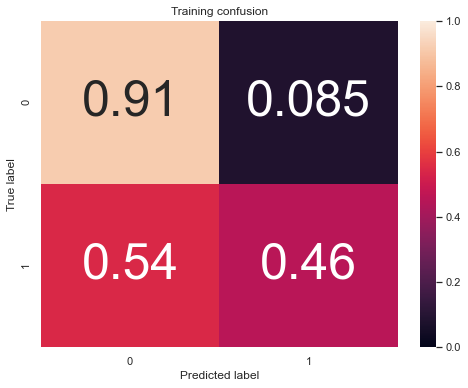

In [55]:
y_pred = dt.predict(X_train)

# Plotting Confusion Matrix
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dt.classes_, title='Training confusion')

In [56]:
# Counting of the confusion matrix
y_pred = dt.predict(X_train)
y_pred
confusion_matrix(y_train, y_pred)

array([[6558,  611],
       [ 997,  834]], dtype=int64)

In [57]:
# Calculating False Positives (FP), False Negatives (FN), True Positives (TP) & True Negatives (TN)
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
print ("The True Positive rate / Recall per class is: ",TPR)

# Precision or positive predictive value
PPV = TP/(TP+FP)
print ("The Precision per class is: ",PPV)

# False positive rate or False alarm rate
FPR = FP/(FP+TN)
print ("The False Alarm rate per class is: ",FPR)

# False negative rate or Miss Rate
FNR = FN/(TP+FN)
print ("The Miss Rate rate per class is: ",FNR)

# Classification error
CER = (FP+FN)/(TP+FP+FN+TN)
print ("The Classification error of each class is", CER)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print ("The Accuracy of each class is", ACC)
print("")

##Total averages :
print ("The average Recall is: ",TPR.sum()/2)
print ("The average Precision is: ",PPV.sum()/2)
print ("The average False Alarm is: ",FPR.sum()/2)
print ("The average Miss Rate rate is: ",FNR.sum()/2)
print ("The average Classification error is", CER.sum()/2)
print ("The average Accuracy is", ACC.sum()/2)

# Explenations:https://youtu.be/0HDy6n3UD5M

The True Positive rate / Recall per class is:  [0.914772 0.455489]
The Precision per class is:  [0.868034 0.577163]
The False Alarm rate per class is:  [0.544511 0.085228]
The Miss Rate rate per class is:  [0.085228 0.544511]
The Classification error of each class is [0.178667 0.178667]
The Accuracy of each class is [0.821333 0.821333]

The average Recall is:  0.685130369325603
The average Precision is:  0.7225985220264771
The average False Alarm is:  0.31486963067439694
The average Miss Rate rate is:  0.31486963067439694
The average Classification error is 0.17866666666666667
The average Accuracy is 0.8213333333333334


# Running Random Forest

**Notes:**

- Random forest is an ensemble classifier that consists of many decision trees and outputs the class that is the mode of the class's output by individual trees.
- Takes the average (entropy/information gain) of many Decision Trees via bagging.
- Bagging is short for “bootstrap aggregation,” meaning that samples are chosen with replacement (bootstrapping), and combined (aggregated) by taking their average

Training Accuracy is:  1.0
Testing Accuracy is:  0.859


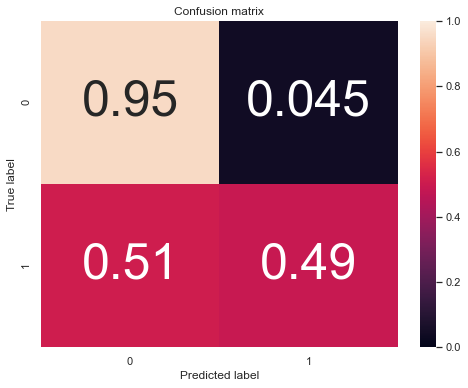

In [58]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf.fit(X_train, y_train)
prediction_test = rf.predict(X=X_test)

# source: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

# Accuracy on Test
print("Training Accuracy is: ", rf.score(X_train, y_train))
# Accuracy on Train
print("Testing Accuracy is: ", rf.score(X_test, y_test))

# Confusion Matrix
cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)

Classification accuracy on test set with max features = 1 and max_depth = None: 0.860
Classification accuracy on test set with max features = 1 and max_depth = 2: 0.794
Classification accuracy on test set with max features = 1 and max_depth = 3: 0.794
Classification accuracy on test set with max features = 1 and max_depth = 4: 0.797
Classification accuracy on test set with max features = 1 and max_depth = 5: 0.802
Classification accuracy on test set with max features = sqrt and max_depth = None: 0.868
Classification accuracy on test set with max features = sqrt and max_depth = 2: 0.800
Classification accuracy on test set with max features = sqrt and max_depth = 3: 0.812
Classification accuracy on test set with max features = sqrt and max_depth = 4: 0.831
Classification accuracy on test set with max features = sqrt and max_depth = 5: 0.850
Classification accuracy on test set with max features = log2 and max_depth = None: 0.868
Classification accuracy on test set with max features = log2

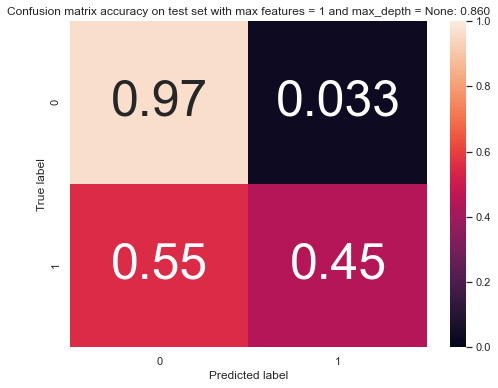

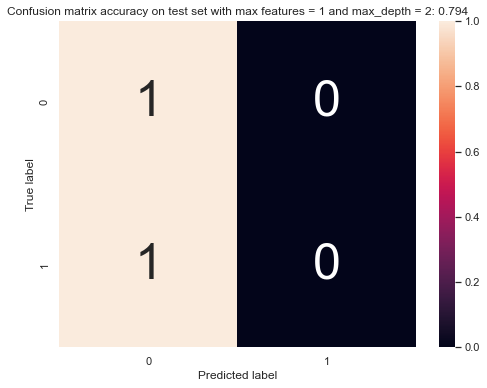

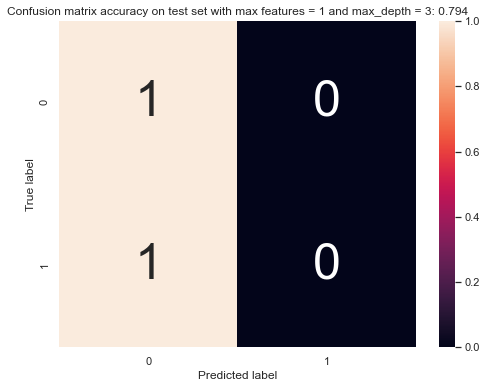

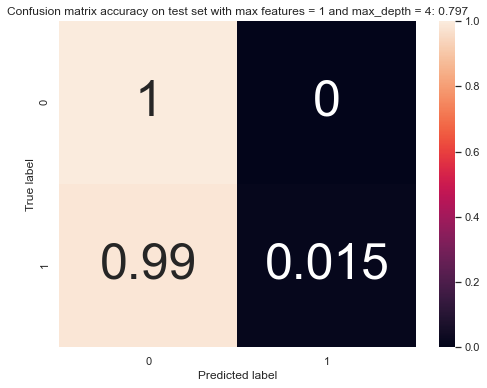

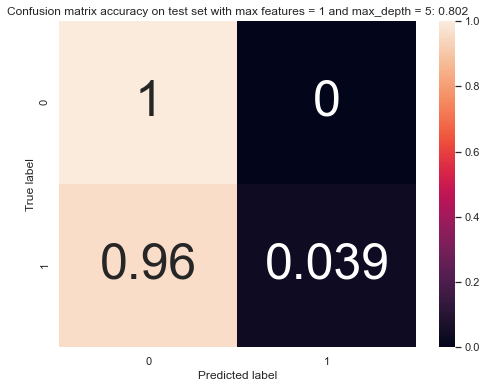

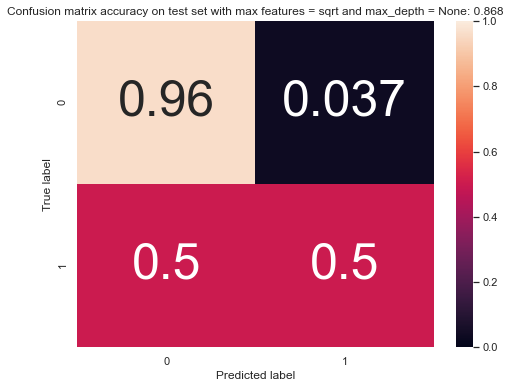

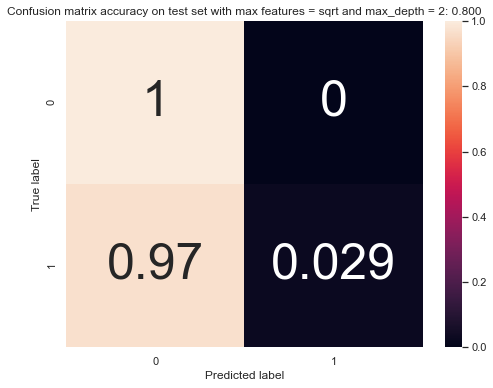

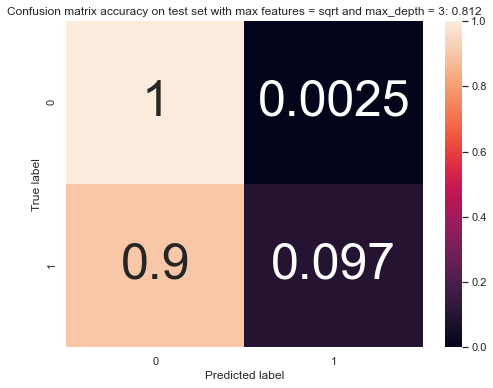

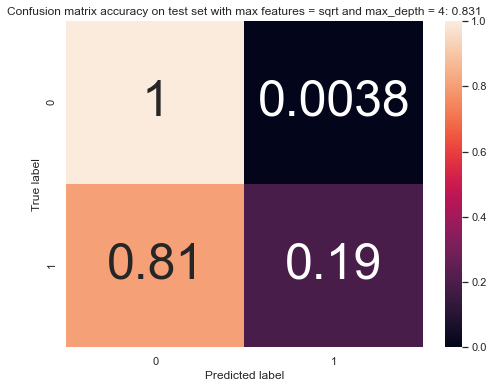

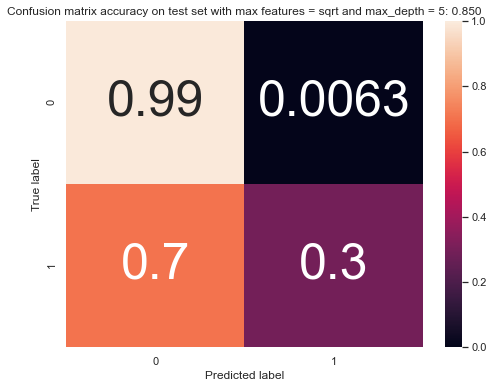

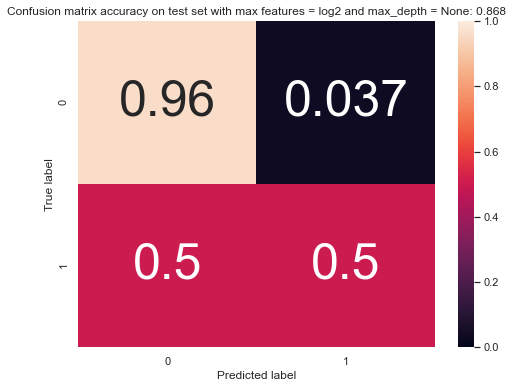

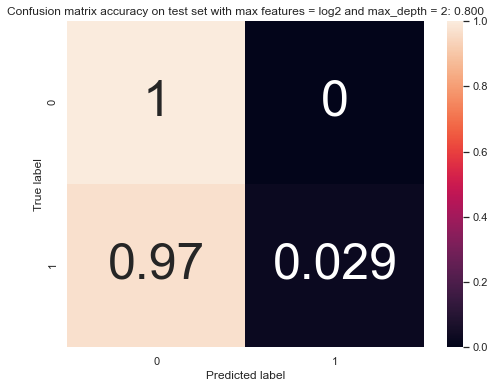

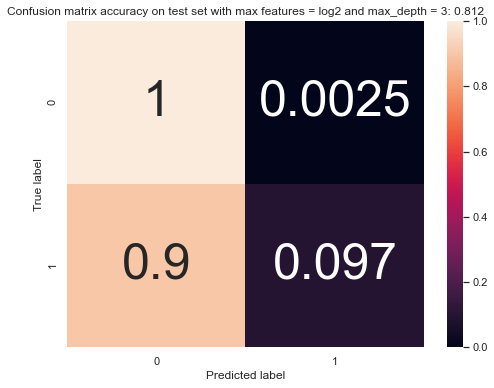

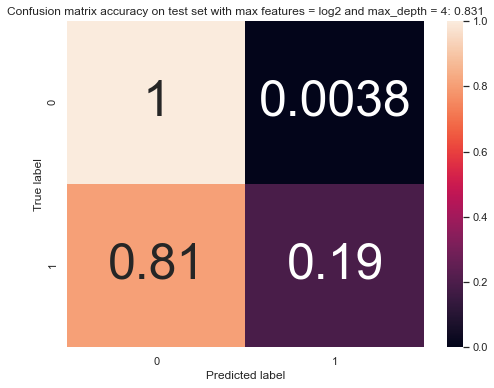

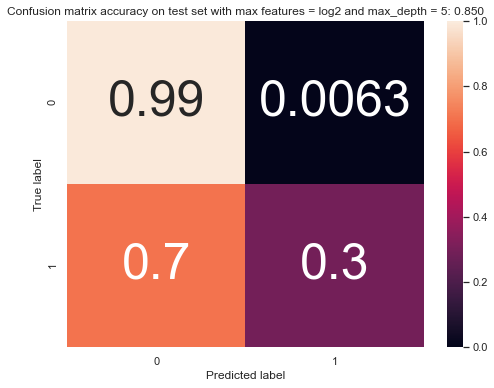

In [59]:
# Tunning Random Forest

from itertools import product
n_estimators = 100
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 2, 3, 4, 5]
for f, d in product(max_features, max_depths): # with product we can iterate through all possible combinations
    rf = RandomForestClassifier(n_estimators=n_estimators, 
                                criterion='entropy', 
                                max_features=f, 
                                max_depth=d, 
                                n_jobs=2,
                                random_state=1337)
    rf.fit(X_train, y_train)
    prediction_test = rf.predict(X=X_test)
    print('Classification accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))
    cm = confusion_matrix(y_test, prediction_test)
    cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
    plt.figure()
    plot_confusion_matrix(cm_norm, classes=rf.classes_,
    title='Confusion matrix accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))

# XGBoost

**Notes:**

- XGBoost is short for “eXtreme Gradient Boosting.”
- It is an ensemble model; ensemble models combines different machine learning models into one
- Instead of aggregating predictions, boosters turn weak learners into strong learners by focusing on where the individual models went wrong
- XGBoost trains upon the residuals. Instead of aggregating trees, gradient boosted trees learns from errors during each boosting round

Doc 1: https://xgboost.readthedocs.io/en/latest/parameter.html

Doc 2: https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBClassifier

Doc 3: https://towardsdatascience.com/getting-started-with-xgboost-in-scikit-learn-f69f5f470a97

In [22]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost

classifier=xgboost.XGBClassifier(tree_method='gpu_hist')

params={
    "learning_rate":[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth":[2,3,4,5,6,8,10,12,15],
    "min_child_weight":[1,3,5,7],
    "gamma":[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree":[0.3,0.4,0.5,0.7]}

clf =RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',cv=5,verbose=3)
# source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

# fitting it
clf.fit(X,y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=4, min_child_weight=1; total time=   0.2s
[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=4, min_child_weight=1; total time=   0.0s
[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=4, min_child_weight=1; total time=   0.0s
[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=4, min_child_weight=1; total time=   0.0s
[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=4, min_child_weight=1; total time=   0.0s
[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=15, min_child_weight=5; total time=   0.0s
[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=15, min_child_weight=5; total time=   0.0s
[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=15, min_child_weight=5; total time=   0

XGBoostError: [14:59:49] c:\ci\xgboost-split_1619728435298\work\src\common\common.h:156: XGBoost version not compiled with GPU support.

In [33]:
# best parameters
# clf.best_params_

{'min_child_weight': 7,
 'max_depth': 12,
 'learning_rate': 0.05,
 'gamma': 0.3,
 'colsample_bytree': 0.7}

In [29]:
# getting the model with the best parameters
clf.best_estimator_

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.5, gamma=0.4,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=0.2, max_delta_step=None, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method='gpu_hist',
              validate_parameters=None, verbosity=None)

In [25]:
# fiting the model with the best parameters

final_model = xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.3, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=4,
              min_child_weight=5,  monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

# fitting it
final_model.fit(X,y)

pred_xgboost = final_model.predict(X)

# Confusion Matrix
cm = confusion_matrix(y, pred_xgboost)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)

XGBoostError: [13:01:49] c:\ci\xgboost-split_1619728435298\work\src\common\common.h:156: XGBoost version not compiled with GPU support.

# Deploying our model on NEW, unseen data

In [62]:
# Loading from CSV
unseen_data = pd.read_csv('C:\\Users\\Tuta\\Documents\\Biblioteca do Engenheiro\\Linguagem Computacional\\Python\\Data science\\Predicting Churn\\unseen_data.csv', sep='\t')
unseen_data.head()

,Unnamed: 0,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,1,15634638,AP Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,1,2,15647347,AP Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,2,3,15619340,AP Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,3,4,15701390,AP Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,4,5,15737924,AP Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [63]:
# Applying the same pre-processing stages

# Limiting the data
unseen_data2 = unseen_data[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']]

# dummy variables
unseen_data2 = pd.get_dummies(unseen_data2, columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember'])

#scaling
scale_vars = ['CreditScore','EstimatedSalary','Balance','Age']
unseen_data2[scale_vars] = scaler.fit_transform(unseen_data2[scale_vars])


unseen_data2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,0.538,0.342857,2,0.000000,1,0.507077,1,0,0,1,0,0,1,0,1
1,0.516,0.328571,1,0.334031,1,0.563089,0,0,1,1,0,1,0,0,1
2,0.304,0.342857,8,0.636357,3,0.570039,1,0,0,1,0,0,1,1,0
3,0.698,0.300000,1,0.000000,2,0.469437,1,0,0,1,0,1,0,1,0
4,1.000,0.357143,2,0.500246,1,0.395667,0,0,1,1,0,0,1,0,1


In [64]:
# Making predictions

pred_rf = rf.predict(unseen_data2.values)
pred_prob_rf = rf.predict_proba(unseen_data2.values)

pred_rf

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [65]:
# probabilities
pred_prob_rf

array([[0.793478, 0.206522],
       [0.806729, 0.193271],
       [0.277609, 0.722391],
       ...,
       [0.888134, 0.111866],
       [0.738564, 0.261436],
       [0.863145, 0.136855]])

In [66]:
# function to select second column for probabilities
def column(matrix, i):
    return [row[i] for row in matrix]

column(pred_prob_rf, 1)

[0.20652215181749864,
 0.19327138792523357,
 0.7223914863088605,
 0.1472947066637905,
 0.23133809202965033,
 0.34201452240389957,
 0.1428120544486773,
 0.7124527631697211,
 0.17612331242020385,
 0.08034053375653968,
 0.09889527616069259,
 0.09054456156449431,
 0.12587559952950678,
 0.12704979340283332,
 0.08093238548999951,
 0.26491544450273563,
 0.6206212596609635,
 0.07594768583759208,
 0.39617110701259284,
 0.06586520549813518,
 0.1036170663486623,
 0.13560968676049653,
 0.2304639009586973,
 0.15349356516386292,
 0.12294597446411627,
 0.05868989873870087,
 0.17449567160814325,
 0.2580453939569522,
 0.3790997968911206,
 0.06486001181414386,
 0.482915872821498,
 0.09554765882389253,
 0.2735612482819156,
 0.15565531469758132,
 0.07540896148181947,
 0.44583532920385344,
 0.08742432062348421,
 0.08471743526339612,
 0.08713675509653132,
 0.17913427297964055,
 0.16822125990967637,
 0.5152614539485724,
 0.24694696625173507,
 0.493638286361003,
 0.2508102746054591,
 0.15003020141803552,
 0.1

In [67]:
# Joining the raw data witht the predictions

output = unseen_data.copy()
output['Predictions - Churn or Not'] = pred_rf
output['Predictions - Probability to Churn'] = column(pred_prob_rf, 1)
output['Predictions - Churn or Not Desc'] = 'Empty'
output['Predictions - Churn or Not Desc'][output['Predictions - Churn or Not'] == 0] = 'Retention'
output['Predictions - Churn or Not Desc'][output['Predictions - Churn or Not'] == 1] = 'Churn'
output.head()

,Unnamed: 0,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Predictions - Churn or Not,Predictions - Probability to Churn,Predictions - Churn or Not Desc
0,0,1,15634638,AP Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0.206522,Retention
1,1,2,15647347,AP Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0.193271,Retention
2,2,3,15619340,AP Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0.722391,Churn
3,3,4,15701390,AP Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0.147295,Retention
4,4,5,15737924,AP Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0.231338,Retention


In [ ]:
# Exporting this data back to a New Table in SQL
from sqlalchemy import create_engine
import urllib

quoted = urllib.parse.quote_plus("Driver={SQL Server Native Client 11.0};"
                     "Server=MUFASA-PC/TUTA;"
                     "Database=PENSE;"
                     "Trusted_Connection=yes;")

engine = create_engine('mssql+pyodbc:///?odbc_connect={}'.format(quoted))

output.to_sql('Churn Predictions Output', schema='dbo', con = engine, if_exists = 'replace')

In [68]:
# Exporting the data in a CSV
output.to_csv(r'C:\\Users\\Tuta\\Documents\\Biblioteca do Engenheiro\\Linguagem Computacional\\Python\\Data science\\Predicting Sales\\Prediction Sales.csv', sep='\t')

os. getcwd()

'C:\\Users\\Tuta\\Documents\\Biblioteca do Engenheiro\\Linguagem Computacional\\Python\\Data science'